In [2]:
import tensorflow as tf
print(tf.__version__)


2.20.0


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model


In [4]:
DATASET_PATH = r"C:\Users\nandhini\OneDrive\Desktop\Hibiscus\Hibiscus Leaf Diseases Classification Dataset"



In [5]:
print(os.listdir(DATASET_PATH))


['Citruspot', 'Early_Mild_Spotting', 'Fungal_Infected', 'Healthy', 'Mild_Edge_Damage', 'Senescent', 'Slightly_Diseased', 'Wrinkled_Leaf']


In [10]:
IMG_SIZE = 224
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)


Found 903 images belonging to 8 classes.
Found 222 images belonging to 8 classes.


In [12]:
base_model = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)

base_model.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(train_data.num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)


In [14]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [16]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20
)


Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.3378 - loss: 8.3952 - val_accuracy: 0.3874 - val_loss: 2.0669
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.4164 - loss: 1.7909 - val_accuracy: 0.2072 - val_loss: 2.5757
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.4319 - loss: 1.7360 - val_accuracy: 0.3694 - val_loss: 2.0581
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.4507 - loss: 1.5712 - val_accuracy: 0.2252 - val_loss: 3.1039
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.4563 - loss: 1.4976 - val_accuracy: 0.3378 - val_loss: 2.1068
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.4684 - loss: 1.4852 - val_accuracy: 0.2658 - val_loss: 2.9003
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.4585 - loss: 1.4305 - val_accuracy: 0.2432 - val_loss: 4.0271
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.4518 - loss: 1.4112 - val_accuracy: 0.3108 - val_loss:

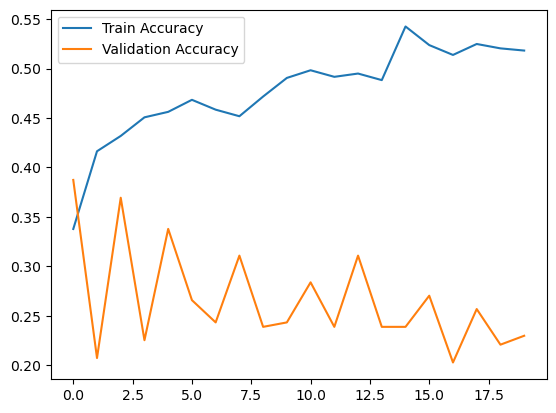

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.show()


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import os

img_path = os.path.join(
    DATASET_PATH,
    "Healthy",
    os.listdir(os.path.join(DATASET_PATH, "Healthy"))[0]
)

img = image.load_img(img_path, target_size=(224,224))
img = image.img_to_array(img) / 255.0
img = np.expand_dims(img, axis=0)

prediction = model.predict(img)

class_names = list(train_data.class_indices.keys())
print("Predicted Class:", class_names[np.argmax(prediction)])


In [ ]:
model.save("hibiscus_leaf_disease_model.h5")
